In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import math
from ipywidgets import interact_manual


In [2]:
fs = 400
fm = 2
fc = 15
vm = 2
vc = 5
x = np.arange(0, 3, 1/fs)

In [3]:
mt = vm*np.sin(2*np.pi*fm*x)
carrier = vc*np.cos(2*np.pi*fc*x)

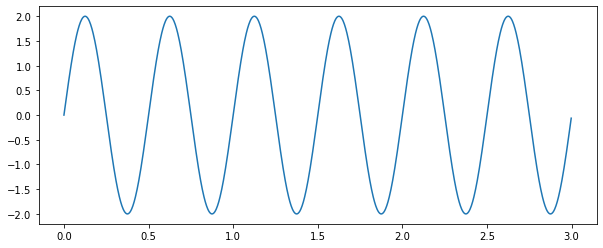

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(x, mt)

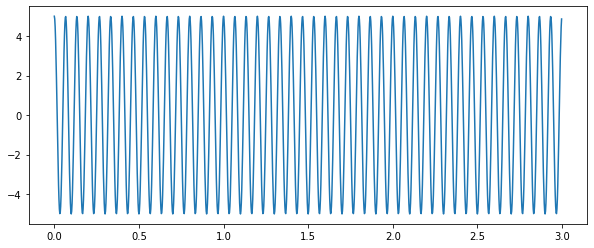

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(x, carrier)

In [6]:
modulated_signal = (1 + mt/vc)*carrier

In [7]:
m = vm/vc
m

0.4

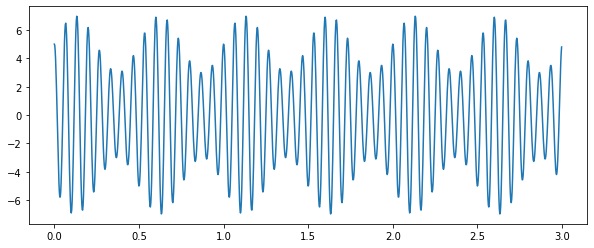

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(x, modulated_signal)

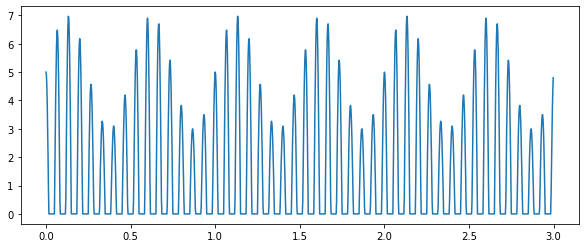

In [9]:
def half_wave_rectifier(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = 0
    
    return x

modulated_signal = half_wave_rectifier(modulated_signal)

plt.figure(figsize=(10, 4))
plt.plot(x, modulated_signal)

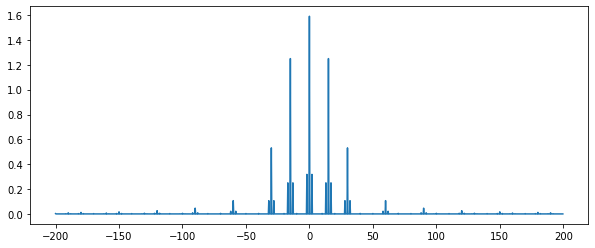

In [10]:
ffx = np.fft.fftshift(np.fft.fftfreq(len(x), 1/fs))
mod_ft = np.fft.fft(modulated_signal)/len(x)
plt.figure(figsize=(10, 4))
plt.plot(ffx, np.fft.fftshift(abs(mod_ft)))

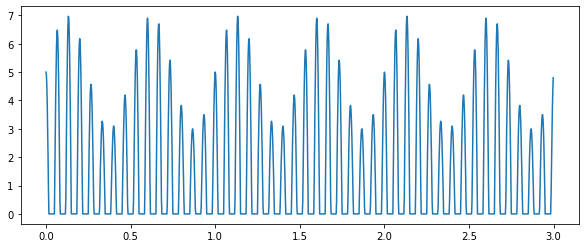

In [11]:
sig = modulated_signal      #signal.square(2*np.pi*x)
plt.figure(figsize=(10, 4))
plt.plot(x, sig)

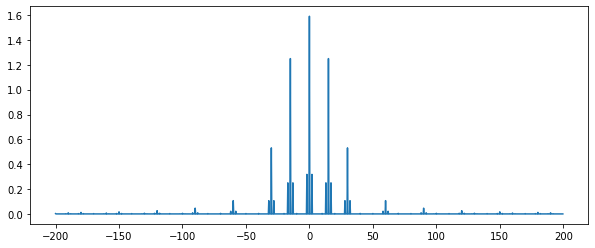

In [12]:
sq_fft = np.fft.fft(sig)/len(sig)
sq_fft = np.fft.fftshift(sq_fft)
plt.figure(figsize=(10, 4))
plt.plot(ffx, abs(sq_fft))

In [13]:
1/fc

0.06666666666666667

In [14]:
ll = math.sqrt(1-m*m)/(m*2*np.pi*fm)
ll

0.18233489348624987

In [15]:
R = 1
C = 0.2
R*C

0.2

In [16]:
integrator_tf = 1/(2+2j*np.pi*ffx*R*C)

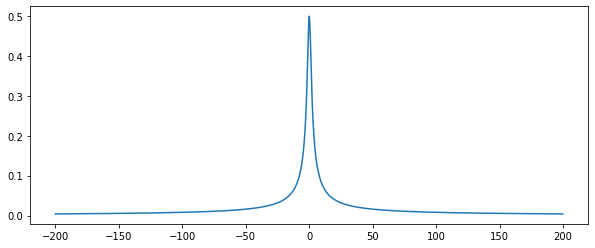

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(ffx, np.abs(integrator_tf))

In [18]:
integrated = sq_fft * integrator_tf

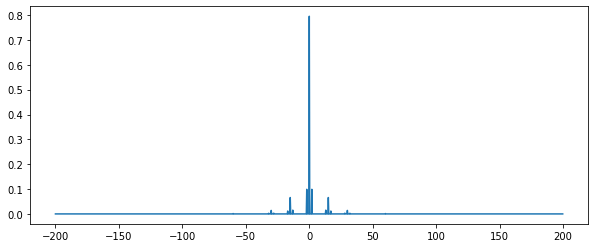

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(ffx, (abs(integrated)))

In [21]:
#%matplotlib ipympl
@interact_manual()
def integrated_output(R1=(0, 10, 0.01), R=(0, 10, 0.1), C=(0, 10, 0.05)):
    plt.close()
    integrator_tf = R/(R1+R+2j*np.pi*ffx*R1*R*C)
    integrated = sq_fft * integrator_tf
    plt.figure(figsize=(10, 4))
    output = np.fft.ifft(np.fft.fftshift(integrated))*len(x)
    plt.plot(x[:500], np.abs(output)[:500])
    plt.plot(x[:500], modulated_signal[:500])
    print(R1*C)
    print(R*C)

interactive(children=(FloatSlider(value=5.0, description='R1', max=10.0, step=0.01), FloatSlider(value=5.0, de…

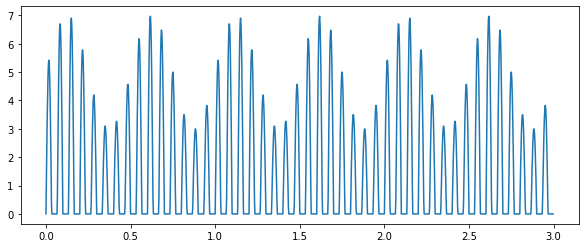

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(x, modulated_signal)